## Lets Build ML model

#### i)split dataset into train & test

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.25, random_state=42)

#### what we often do in modelling:

    a..Initially ,lets build basic random model.
    b..then later-on , we will try to improve this model using some parameters..
    c..Then we will try to improve it..
    d..Then we will hyper-tune my model to get optimal value of parameters in order to achieve optimal value of params..

In [148]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
ml_model = RandomForestRegressor()

In [150]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [151]:
y_pred = ml_model.predict(X_test)

In [152]:
y_pred

array([16744.87,  6291.59,  8840.03, ...,  3528.6 ,  6461.49,  6785.11])

In [153]:
from sklearn import metrics

In [154]:
metrics.r2_score(y_test , y_pred)

0.8061777476681846

### ii) Lets Save model

#### lets try to dump ml model using pickle or joblib..
    advantage of dumping--
    imagine in future we have new data & lets say we have to predict price on this huge data

    then to do prediction on this new data , we can use this pre-trained model what we have dumped..


In [ ]:
!pip install pickle

In [155]:
import pickle

In [156]:
# open a file, where you want to store the data
file = open(r'Z:\Flight_Price\Datasets/rf_random.pkl' , 'wb')

In [157]:
# dump information to that file
pickle.dump(ml_model , file)

In [158]:
model = open(r'Z:\Flight_Price\Datasets/rf_random.pkl' , 'rb')

In [159]:
forest = pickle.load(model)

In [161]:
y_pred2 = forest.predict(X_test)

In [162]:
metrics.r2_score(y_test , y_pred2)

0.8061777476681846

## How to automate ml pipeline & How to define your Evaluation metric..

### i) how to make our own metric...

In [163]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [164]:
mape(y_test , y_pred)

13.247647518053313

### ii) How to automate ml pipeline !

In [165]:
from sklearn import metrics

In [166]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print('Training score : {}'.format(model.score(X_train , y_train)))
    y_predection = model.predict(X_test)
    print('predictions are : {}'.format(y_predection))
    print('\n')
    r2_score = metrics.r2_score(y_test , y_predection)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_predection)))
    print('MSE : {}'.format(metrics.mean_squared_error(y_test , y_predection)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_predection))))
    print('MAPE : {}'.format(mape(y_test , y_predection)))
    sns.distplot(y_test - y_predection)

Training score : 0.9512447050359809
predictions are : [16753.62  6414.15  8879.07 ...  3527.02  6268.23  6908.65]


r2 score : 0.8081762295335504
MAE : 1186.4927309208845
MSE : 3734348.3697542027
RMSE : 1932.4462139356435
MAPE : 13.304873080407178


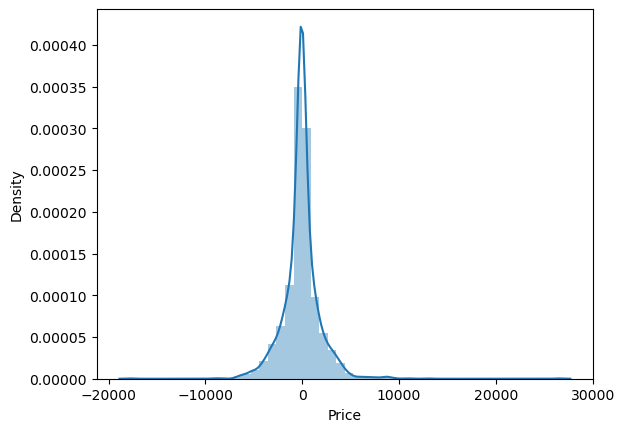

In [167]:
predict(RandomForestRegressor())

In [168]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.966591628243878
predictions are : [16840.  6976.  8610. ...  3419.  5797.  6818.]


r2 score : 0.6996399141630966
MAE : 1368.7372394858357
MSE : 5847289.90654707
RMSE : 2418.1170167192217
MAPE : 15.205975817573686


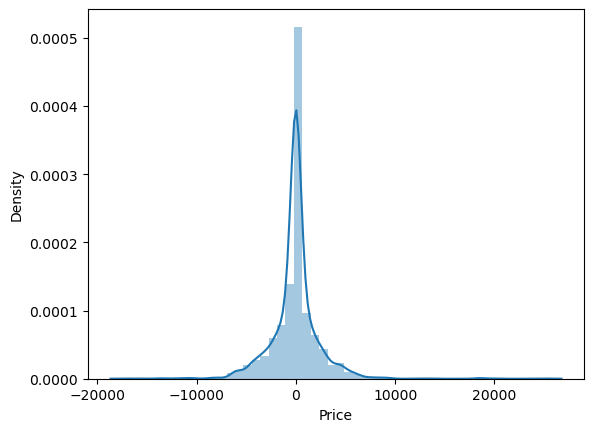

In [169]:
predict(DecisionTreeRegressor())